## Using sklearn library


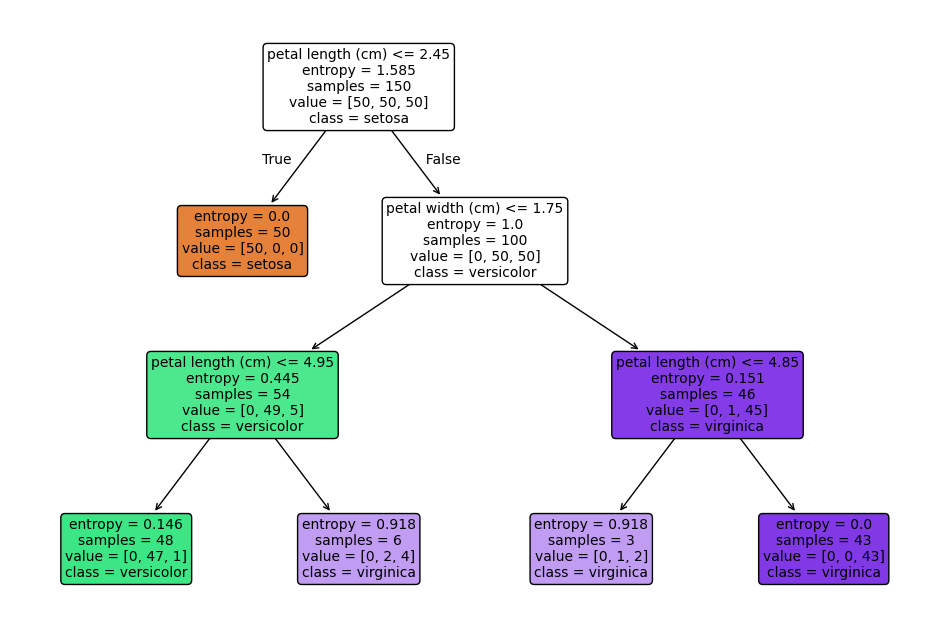

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()



Decision Tree Structure:
?(attribute :  petal length (cm) <= 1.90)
  Y: Class: setosa
  N: ?(attribute :  petal length (cm) <= 4.70)
    Y: ?(attribute :  petal width (cm) <= 1.50)
      Y: Class: versicolor
      N: Class: virginica
    N: ?(attribute :  petal length (cm) <= 5.10)
      Y: ?(attribute :  petal width (cm) <= 1.70)
        Y: ?(attribute :  sepal length (cm) <= 6.30)
          Y: Class: versicolor
          N: Class: versicolor
        N: ?(attribute :  sepal width (cm) <= 3.00)
          Y: Class: virginica
          N: Class: versicolor
      N: Class: virginica



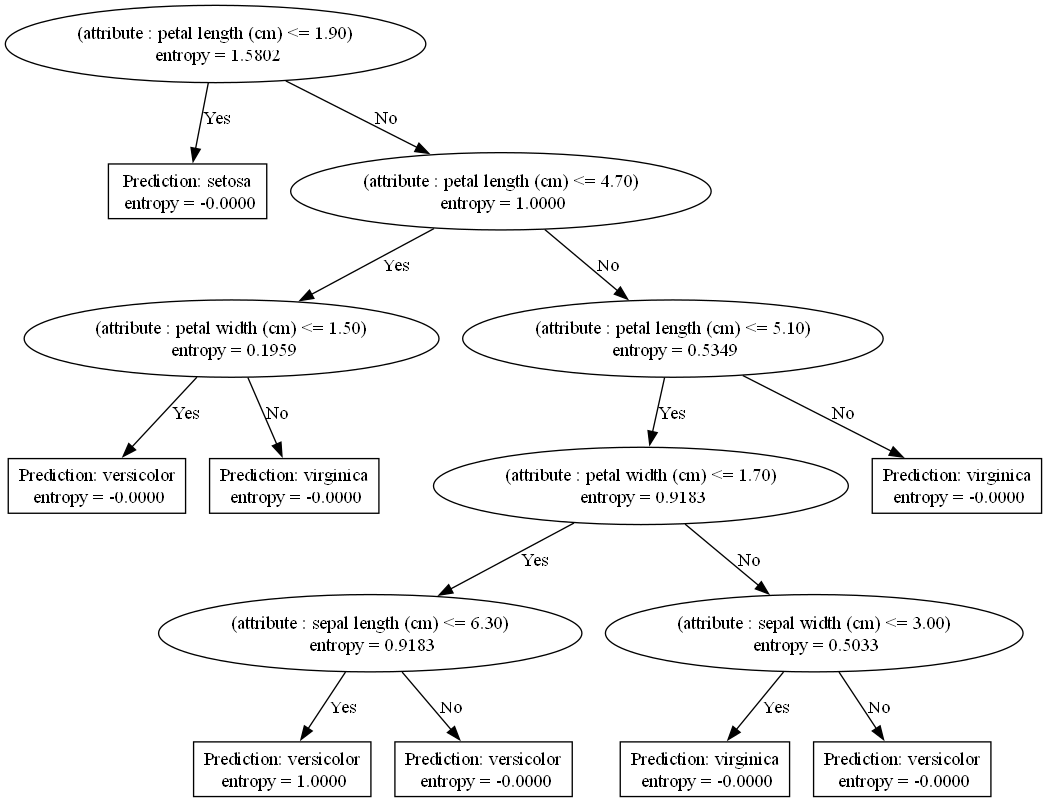

Criteria : information_gain
Accuracy : 0.9111111111111111
Precision for setosa: 1.0
Recall for setosa: 1.0
Precision for versicolor: 0.8461538461538461
Recall for versicolor: 0.8461538461538461
Precision for virginica: 0.8461538461538461
Recall for virginica: 0.8461538461538461


In [ ]:
import sys
import os

# Add the path to the directory containing tree.py
sys.path.append(os.path.abspath("../"))
from sklearn.model_selection import train_test_split
from tree.base import DecisionTree
from metrics import *
import numpy as np
from IPython.display import Image, display


iris = load_iris()
X, y = iris.data, iris.target

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series([iris.target_names[i] for i in iris.target])  
criteria = 'information_gain'  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTree(criterion=criteria)
tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
tree.plot()
print("Criteria :", criteria)
print("Accuracy :", accuracy(y_test, y_hat))

classes = iris.target_names
for cls in classes:
	print(f"Precision for {cls}: {precision(y_test, y_hat, cls)}")
	print(f"Recall for {cls}: {recall(y_test, y_hat, cls)}")


### Inference
- Both trees classify Setosa, Versicolor, and Virginica correctly.  
- Our implementation produces a **deeper and more complex tree** with different thresholds (e.g., petal length ≤ 1.90 vs sklearn’s 2.45).  
- Sklearn’s tree is **simpler, more balanced, and optimal** due to exhaustive threshold search and pruning.  
- Our tree works but may **overfit** or include redundant splits, while sklearn avoids unnecessary complexity.
